In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
os.chdir('C:/Users/6997619/Documents/GitHub projects/DHZW-simulation_Sim-2APL/src/main/resources/sensitivity_analysis/data')
df_input = pd.read_csv('parametersets.csv')

os.chdir('C:/Users/6997619/Documents/GitHub projects/DHZW-simulation_Sim-2APL/src/main/resources/sensitivity_analysis/output')
df_output = pd.read_csv('output_proportions.csv')

print(df_output.shape[0] == df_input.shape[0])

# put parameters and results together
df = pd.concat([df_input, df_output], axis=1)

True


In [14]:
df

,alphaWorkCarDriver,alphaWorkCarPassenger,alphaWorkBus,alphaWorkTrain,betaTimeWorkWalk,betaTimeWorkBike,betaTimeWorkCarDriver,betaTimeWorkCarPassenger,betaTimeWorkBus,betaTimeWorkTrain,...,betaChangesTransportSchool,betaChangesTransportLeisure,used_parameter_label,used_parameter_value,CAR_DRIVER,CAR_PASSENGER,BIKE,BUS_TRAM,TRAIN,WALK
0,0.4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,alphaWorkCarDriver,0.4,0.038118,0.463457,0.175075,0.138490,0.010511,0.174350
1,0.7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,alphaWorkCarDriver,0.7,0.039735,0.463337,0.176745,0.137650,0.010384,0.172150
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,alphaWorkCarDriver,1.0,0.038164,0.463841,0.175728,0.139282,0.010476,0.172511
3,1.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,alphaWorkCarDriver,1.3,0.038926,0.466184,0.174543,0.139557,0.009950,0.170839
4,1.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,alphaWorkCarDriver,1.6,0.040245,0.463255,0.172454,0.138233,0.011020,0.174793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.4,betaChangesTransportLeisure,0.4,0.038231,0.438292,0.163147,0.186388,0.011452,0.162490
236,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.7,betaChangesTransportLeisure,0.7,0.040163,0.452425,0.166153,0.159457,0.010667,0.171134
237,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,betaChangesTransportLeisure,1.0,0.039913,0.466994,0.171701,0.137660,0.010399,0.173333
238,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.3,betaChangesTransportLeisure,1.3,0.039733,0.476969,0.177059,0.117046,0.009778,0.179415


# Plot linear regressions

In [15]:
threshold_slope_abs = 0.005

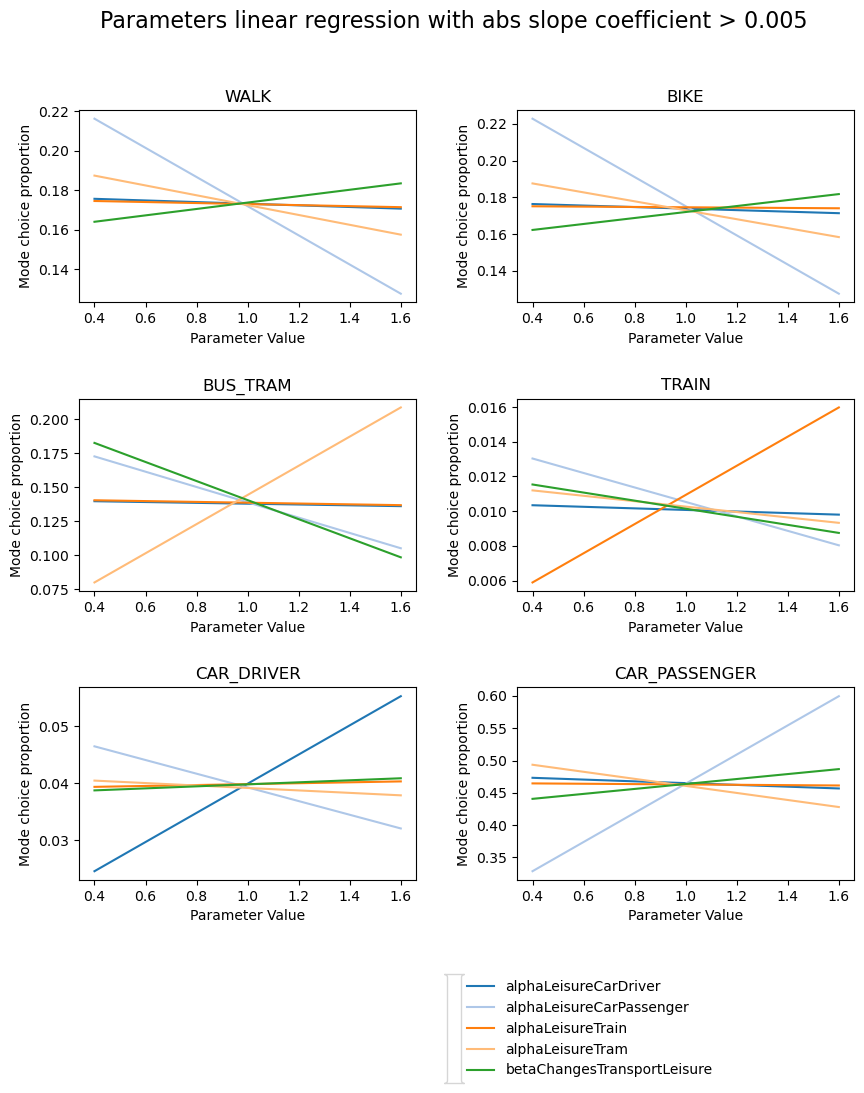

In [17]:
# Initialize an empty list to store parameter names with slope > 0.1
params_with_slope = []

# Loop over each group and calculate the slope for each parameter
for name, group in groups:
    for col in output_cols:
        # Calculate the slope for this parameter and output column
        slope, intercept = np.polyfit(group['used_parameter_value'], group[col], 1)
        
        # Check if the absolute value of the slope is greater than 0.1
        if abs(slope) > threshold_slope_abs:
            # Add the parameter name to the list
            params_with_slope.append(name)
            break  # Only need to add the parameter name once

# Filter the dataframe to only include rows with parameter names in params_with_slope
df_filtered = df[df['used_parameter_label'].isin(params_with_slope)]

# Group the filtered data by parameter name
groups_filtered = df_filtered.groupby('used_parameter_label')

# Create a new figure with a 3x2 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

# Initialize a dictionary to store the colors for each group
colors = {}

# Loop over each output column and plot the data in a separate subplot
for i, col in enumerate(output_cols):
    # Get the axis object for this subplot
    ax = axs[i // 2, i % 2]
    
    j = 0
    # Loop over each group and plot the data for this output column
    for name, group in groups_filtered:
        # Extract the x and y values for this group and output column
        x = group['used_parameter_value']
        y = group[col]
        
        # Assign a color to this group based on its name
        if name not in colors:
            colors[name] = plt.cm.tab20(j)
        
        # Plot the data points
        slope, intercept = np.polyfit(x, y, 1)
        regression_line = intercept + slope * x
        ax.plot(x, regression_line, label=name, color=colors[name])
        
        j=j+1
    
    # Set the title for this subplot to the name of the output column
    ax.set_title(col)
    
    # Set the axis labels for this subplot
    ax.set_xlabel('Parameter Value')
    ax.set_ylabel('Mode choice proportion')
    
# Create a legend for the whole figure
handles, labels = [], []
for name, group in groups_filtered:
    for col in output_cols:
        if name in params_with_slope:
            # Check if the parameter name has already been added to the labels list
            if name not in labels:
                # Add a handle to the handles list for this parameter name
                handle = plt.plot([], [], label=name, color=colors[name])[0]
                handles.append(handle)
                labels.append(name)

fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=1, mode='expand')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Title
fig.suptitle('Parameters linear regression with abs slope coefficient > '+str(threshold_slope_abs), fontsize=16)

# Save
plt.savefig('plot_slopes_'+str(threshold_slope_abs)+'.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Rank parameters per mode choice

In [19]:
all_rankings = pd.DataFrame()

for col in output_cols:
    print(f'Ranking of parameters for {col}:')
    ranking = pd.DataFrame(slopes).loc[col].sort_values(ascending=False)
    print(ranking)
    print('\n')
    ranking.name = col
    all_rankings = pd.concat([all_rankings, ranking], axis=1)

all_rankings.to_csv('parameters_rankings.csv')

Ranking of parameters for WALK:
betaChangesTransportLeisure     0.016236
betaCostLeisureTrain            0.002758
betaTimeLeisureBike             0.002558
betaCostSchoolBusTram           0.002410
betaTimeWorkBus                 0.002286
betaCostWorkBus                 0.002059
alphaWorkTrain                  0.001856
betaCostWorkCarPassenger        0.001489
betaCostLeisureCarDriver        0.001199
betaTimeWalkTransportLeisure    0.001017
betaCostLeisureBus              0.000960
alphaWorkBus                    0.000942
alphaSchoolCarPassenger         0.000892
alphaWorkCarPassenger           0.000786
betaTimeWorkCarPassenger        0.000501
betaTimeLeisureCarDriver        0.000500
betaCostWorkTrain               0.000410
betaTimeLeisureWalk             0.000189
betaTimeWorkBike                0.000152
betaTimeSchoolBus               0.000118
betaCostLeisureCarPassenger     0.000098
betaTimeSchoolBike             -0.000021
betaTimeLeisureTrain           -0.000041
alphaWorkCarDriver       